In [10]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

In [12]:
mut_total = pd.read_csv('./data/missense_mutations.csv')

print(mut_total.groupby(['dataset', 'assembly']).chr.count().unstack())

assembly  GRCh37  GRCh38
dataset                 
WES       390983  377919
WGS       138615    2985


In [3]:
mut_total

,disease,sample,cohort,assembly,snp/indel,chr,start,end,ref,var,annotations,dataset,aa_change,cdn_change,strand
0,ALL,SJTALL001,doi:10.1038/nature10725,GRCh37,SNP,10,106160610,106160610,G,A,SOMATIC:Whole exome; dbSNP v147,WES,R/H,cGc/cAc,1
1,ALL,SJTALL001,doi:10.1038/nature10725,GRCh37,SNP,10,59986857,59986857,C,T,SOMATIC:Whole exome,WES,R/Q,cGa/cAa,-1
2,ALL,SJTALL001,doi:10.1038/nature10725,GRCh37,SNP,1,115256528,115256528,T,G,SOMATIC:Whole exome; dbSNP v147,WES,Q/H,caA/caC,-1
3,Lymph-BNHL,PD4301d,doi:10.1038/nature12477,GRCh37,SNP,1,115256528,115256528,T,G,SOMATIC:Whole exome; dbSNP v147,WES,Q/H,caA/caC,-1
4,ALL,SJTALL001,doi:10.1038/nature10725,GRCh37,SNP,13,39430295,39430295,G,A,SOMATIC:Whole exome,WES,V/M,Gtg/Atg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910497,Sarcoma,PD7530a,PMID:24633157,GRCh38,SNP,15,74722881,74722881,G,A,WGS:SOMATIC; dbSNP v147,WGS,V/L,Gtg/Ttg,-1
910498,Sarcoma,PD7530a,PMID:24633157,GRCh38,SNP,19,37888313,37888313,G,A,WGS:SOMATIC,WGS,K/N,aaG/aaT,-1
910499,Sarcoma,PD7530a,PMID:24633157,GRCh38,SNP,5,141183577,141183577,G,A,WGS:SOMATIC; dbSNP v147; 1000 genomes,WGS,V/M,Gtg/Atg,1
910500,Sarcoma,PD7530a,PMID:24633157,GRCh38,SNP,6,137206286,137206286,G,A,WGS:SOMATIC,WGS,D/Y,Gat/Tat,-1


In [13]:
mut_total['disease'].value_counts()#.iloc[20:40]

Skin-Melanoma                149523
ColoRect-AdenoCa             143851
Skin-BCC                     123116
Skin-SCC                      60382
Lung-AdenoCa                  47313
                              ...  
Small-Intestine-carcinoid       125
Kidney-Wilms                     53
Breast-Fibroadenoma              27
Eye-RB                            9
Bone-cancer                       6
Name: disease, Length: 61, dtype: int64

In [16]:
mut_total.groupby('sample').chr.count().sort_values().tail(150)

sample
CSCC-18-T      1135
5-VS097-T1     1136
V-124          1137
MELA_0181      1147
CSCC-32-T      1151
               ... 
CSCC-31-T      5835
CSCC-27-T      6285
sysucc-919T    6314
MELA_0260      6975
587376         7191
Name: chr, Length: 150, dtype: int64

In [25]:
x

3281

In [21]:
[x for x in spectra_wes192.columns if x.startswith('Skin-SCC')]

['Skin-SCC::CSCC-1-T',
 'Skin-SCC::CSCC-10-T',
 'Skin-SCC::CSCC-11-T',
 'Skin-SCC::CSCC-15-T',
 'Skin-SCC::CSCC-16-T',
 'Skin-SCC::CSCC-17-T',
 'Skin-SCC::CSCC-18-T',
 'Skin-SCC::CSCC-19-T',
 'Skin-SCC::CSCC-2-T',
 'Skin-SCC::CSCC-20-T',
 'Skin-SCC::CSCC-27-T',
 'Skin-SCC::CSCC-29-T',
 'Skin-SCC::CSCC-30-T',
 'Skin-SCC::CSCC-31-T',
 'Skin-SCC::CSCC-32-T',
 'Skin-SCC::CSCC-35-T',
 'Skin-SCC::CSCC-37-T',
 'Skin-SCC::CSCC-38-T',
 'Skin-SCC::CSCC-4-T',
 'Skin-SCC::CSCC-40-T',
 'Skin-SCC::CSCC-41-T',
 'Skin-SCC::CSCC-42-T',
 'Skin-SCC::CSCC-44-T',
 'Skin-SCC::CSCC-45-T',
 'Skin-SCC::CSCC-46-T',
 'Skin-SCC::CSCC-47-T',
 'Skin-SCC::CSCC-49-T',
 'Skin-SCC::CSCC-5-T',
 'Skin-SCC::CSCC-52-T',
 'Skin-SCC::CSCC-54-T',
 'Skin-SCC::CSCC-55-T',
 'Skin-SCC::CSCC-56-T',
 'Skin-SCC::CSCC-57-T',
 'Skin-SCC::CSCC-58-T',
 'Skin-SCC::CSCC-59-T',
 'Skin-SCC::CSCC-6-T',
 'Skin-SCC::CSCC-60-T',
 'Skin-SCC::CSCC-62-T',
 'Skin-SCC::CSCC-7-T',
 'Skin-SCC::cSCCP1',
 'Skin-SCC::cSCCP2',
 'Skin-SCC::cSCCP4',
 'Skin-

## Spectra

In [13]:
from pymutspec.annotation import rev_comp, transcriptor
from pymutspec.draw import plot_mutspec12, plot_mutspec192

In [14]:
spectra_wes192 = pd.read_csv(
    './Input_Data_PCAWG7_23K_Spectra_DB/Mutation_Catalogs_--_Spectra_of_Individual_Tumours/WES_Other.192.csv')
spectra_wes192['Mut'] = spectra_wes192.apply(
    lambda x: x.Trinucleotide[0] + '[' + x['Mutation type'] + ']' + x.Trinucleotide[-1], axis=1)
spectra_wes192.loc[spectra_wes192.Strand == 'T', 'Mut'] = spectra_wes192[spectra_wes192.Strand == 'T'].Mut.apply(rev_comp)
spectra_wes192.loc[spectra_wes192.Strand == 'T', 'Mutation type'] = \
    spectra_wes192.loc[spectra_wes192.Strand == 'T', 'Mutation type'].str.translate(transcriptor)
spectra_wes192

,Strand,Mutation type,Trinucleotide,ALL::TARGET-10-PAIXPH-03A-01D,ALL::TARGET-10-PAKHZT-03A-01R,ALL::TARGET-10-PAKMVD-09A-01D,ALL::TARGET-10-PAKSWW-03A-01D,ALL::TARGET-10-PALETF-03A-01D,ALL::TARGET-10-PALLSD-09A-01D,ALL::TARGET-10-PAMDKS-03A-01D,...,Head-SCC::V-112,Head-SCC::V-116,Head-SCC::V-119,Head-SCC::V-123,Head-SCC::V-124,Head-SCC::V-125,Head-SCC::V-14,Head-SCC::V-29,Head-SCC::V-98,Mut
0,T,A>C,TTT,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A[A>C]A
1,T,A>C,GTT,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A[A>C]C
2,T,A>C,CTT,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A[A>C]G
3,T,A>C,ATT,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A[A>C]T
4,T,A>C,TTG,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C[A>C]A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,U,T>G,GTT,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,G[T>G]T
188,U,T>G,TTA,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,T[T>G]A
189,U,T>G,TTC,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T[T>G]C
190,U,T>G,TTG,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T[T>G]G


In [ ]:
from scipy.spatial.distance import pdist, squareform

_spe = spectra_wes192.iloc[:, 3:-1].T
_spe = _spe[_spe.sum(1) > 100]

pd.DataFrame(1 - squareform(pdist(_spe, metric='cosine')), 
    columns=_spe.index, index=_spe.index)

,ALL::TARGET-10-PARBRK-04A-01D,Breast-cancer::PD4132a,Breast-cancer::PD4137a,AML::SNUH_G03_S1,AML::SNUH_G09_S1,AML::SNUH_G10_S1,AML::SNUH_G12_S1,AML::SNUH_G13_S1,AML::SNUH_G14_S1,AML::SNUH_G15_S1,...,Thy-AdenoCa::PTC-515C,Thy-AdenoCa::PTC-53C,Thy-AdenoCa::PTC-54C,Thy-AdenoCa::PTC-70C,Thy-AdenoCa::PTC-7C,Thy-AdenoCa::PTC-88C,Head-SCC::V-112,Head-SCC::V-116,Head-SCC::V-119,Head-SCC::V-123
ALL::TARGET-10-PARBRK-04A-01D,1.000000,0.376707,0.061306,0.120680,0.225548,0.647925,0.330717,0.468576,0.154778,0.111637,...,0.567379,0.552926,0.545681,0.617643,0.701483,0.444474,0.523381,0.239430,0.660775,0.313552
Breast-cancer::PD4132a,0.376707,1.000000,0.739599,0.156052,0.275544,0.458378,0.269454,0.323176,0.158180,0.115393,...,0.394777,0.389917,0.342473,0.407715,0.431893,0.365099,0.512530,0.799023,0.400307,0.753501
Breast-cancer::PD4137a,0.061306,0.739599,1.000000,0.142578,0.211880,0.233808,0.157022,0.139349,0.124583,0.072594,...,0.189189,0.193326,0.147651,0.200377,0.191301,0.186906,0.454460,0.811233,0.325158,0.759618
AML::SNUH_G03_S1,0.120680,0.156052,0.142578,1.000000,0.226614,0.248024,0.227383,0.183301,0.597555,0.827298,...,0.425827,0.441767,0.576823,0.460717,0.353877,0.571453,0.152001,0.117419,0.122585,0.128754
AML::SNUH_G09_S1,0.225548,0.275544,0.211880,0.226614,1.000000,0.556052,0.556170,0.581983,0.303085,0.317973,...,0.515181,0.552039,0.481841,0.488297,0.522961,0.513433,0.375077,0.316814,0.357240,0.290580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thy-AdenoCa::PTC-88C,0.444474,0.365099,0.186906,0.571453,0.513433,0.721170,0.492209,0.547541,0.575494,0.621124,...,0.878450,0.878599,0.899998,0.873447,0.855727,1.000000,0.447407,0.283799,0.403962,0.293074
Head-SCC::V-112,0.523381,0.512530,0.454460,0.152001,0.375077,0.615140,0.347438,0.413046,0.168173,0.109689,...,0.537305,0.528391,0.449978,0.518264,0.597494,0.447407,1.000000,0.538841,0.840055,0.566435
Head-SCC::V-116,0.239430,0.799023,0.811233,0.117419,0.316814,0.418080,0.172932,0.247409,0.144773,0.093457,...,0.327721,0.338191,0.300527,0.356411,0.352759,0.283799,0.538841,1.000000,0.514306,0.921845
Head-SCC::V-119,0.660775,0.400307,0.325158,0.122585,0.357240,0.641527,0.319813,0.429131,0.192940,0.098936,...,0.553029,0.520224,0.484191,0.529520,0.615110,0.403962,0.840055,0.514306,1.000000,0.581365


In [47]:
spectra_wes192.iloc[:, 3:-1].sum(0).sort_values()

CNS-Medullo::ICGC_MB23                1
Blood-CMDI::PD5746a                   1
Blood-CMDI::PD5725a                   1
Blood-CMDI::PD5708a                   1
Blood-CMDI::PD5701a                   1
                                  ...  
Skin-SCC::CSCC-27-T               10125
ColoRect-AdenoCa::sysucc-311T     12390
ColoRect-AdenoCa::sysucc-1364T    14642
ColoRect-AdenoCa::sysucc-919T     16464
Lung-AdenoCa::31D-T               28462
Length: 9691, dtype: int64

In [147]:
spectra_wes12 = spectra_wes192.groupby('Mutation type')\
    .sum().reset_index().rename(columns={'Mutation type': 'Mut'})
wes_exp12 = spectra_wes12.Mut.apply(lambda x: nuc_cnt[x[0]])
wes_exp12.index = spectra_wes12.Mut
wes_exp12 /= wes_exp12.sum() / 3
spectra_wes12 = (spectra_wes12.set_index('Mut').T / wes_exp12.to_dict()).T
spectra_wes12 = spectra_wes12 / spectra_wes12.sum()
spectra_wes12

,ALL::TARGET-10-PAIXPH-03A-01D,ALL::TARGET-10-PAKHZT-03A-01R,ALL::TARGET-10-PAKMVD-09A-01D,ALL::TARGET-10-PAKSWW-03A-01D,ALL::TARGET-10-PALETF-03A-01D,ALL::TARGET-10-PALLSD-09A-01D,ALL::TARGET-10-PAMDKS-03A-01D,ALL::TARGET-10-PAPJIB-04A-01D,ALL::TARGET-10-PAPLDL-03A-01D,ALL::TARGET-10-PAPSPG-04A-01D,...,Head-SCC::V-109,Head-SCC::V-112,Head-SCC::V-116,Head-SCC::V-119,Head-SCC::V-123,Head-SCC::V-124,Head-SCC::V-125,Head-SCC::V-14,Head-SCC::V-29,Head-SCC::V-98
Mut,,,,,,,,,,,,,,,,,,,,,
A>C,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.030204,...,0.000000,0.005633,0.004593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A>G,0.489872,0.0,1.0,0.105174,0.000000,1.0,1.0,0.029926,0.000000,0.030204,...,0.016145,0.011266,0.009186,0.007616,0.000000,0.000000,0.033920,0.000000,0.240436,0.000000
A>T,0.000000,0.0,0.0,0.105174,0.000000,0.0,0.0,0.029926,0.020058,0.000000,...,0.032291,0.011266,0.018372,0.022847,0.007253,0.020890,0.033920,0.000000,0.000000,0.000000
C>A,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.031688,0.000000,0.000000,...,0.085480,0.005964,0.038908,0.016128,0.046078,0.044241,0.017958,0.317611,0.254593,0.000000
C>G,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.031688,0.000000,0.000000,...,0.085480,0.000000,0.155630,0.000000,0.107515,0.110602,0.071834,0.000000,0.000000,0.000000
C>T,0.000000,0.0,0.0,0.222733,0.463654,0.0,0.0,0.253504,0.488492,0.319820,...,0.256440,0.465223,0.282080,0.499971,0.345582,0.243323,0.305293,0.158806,0.254593,0.565749
G>A,0.510128,0.0,0.0,0.328569,0.000000,0.0,0.0,0.498614,0.417744,0.345978,...,0.353072,0.463387,0.286976,0.428249,0.279441,0.304558,0.317900,0.156177,0.000000,0.420680
G>C,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.062327,0.000000,0.062905,...,0.067252,0.005866,0.124356,0.007931,0.128392,0.152279,0.017661,0.000000,0.000000,0.000000
G>T,0.000000,0.0,0.0,0.109523,0.000000,0.0,0.0,0.062327,0.000000,0.062905,...,0.084065,0.017597,0.057395,0.007931,0.067972,0.021754,0.035322,0.000000,0.250378,0.013570


In [146]:
spectra_wes12 / spectra_wes12.sum()

,ALL::TARGET-10-PAIXPH-03A-01D,ALL::TARGET-10-PAKHZT-03A-01R,ALL::TARGET-10-PAKMVD-09A-01D,ALL::TARGET-10-PAKSWW-03A-01D,ALL::TARGET-10-PALETF-03A-01D,ALL::TARGET-10-PALLSD-09A-01D,ALL::TARGET-10-PAMDKS-03A-01D,ALL::TARGET-10-PAPJIB-04A-01D,ALL::TARGET-10-PAPLDL-03A-01D,ALL::TARGET-10-PAPSPG-04A-01D,...,Head-SCC::V-109,Head-SCC::V-112,Head-SCC::V-116,Head-SCC::V-119,Head-SCC::V-123,Head-SCC::V-124,Head-SCC::V-125,Head-SCC::V-14,Head-SCC::V-29,Head-SCC::V-98
Mut,,,,,,,,,,,,,,,,,,,,,
A>C,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.030204,...,0.000000,0.005633,0.004593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A>G,0.489872,0.0,1.0,0.105174,0.000000,1.0,1.0,0.029926,0.000000,0.030204,...,0.016145,0.011266,0.009186,0.007616,0.000000,0.000000,0.033920,0.000000,0.240436,0.000000
A>T,0.000000,0.0,0.0,0.105174,0.000000,0.0,0.0,0.029926,0.020058,0.000000,...,0.032291,0.011266,0.018372,0.022847,0.007253,0.020890,0.033920,0.000000,0.000000,0.000000
C>A,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.031688,0.000000,0.000000,...,0.085480,0.005964,0.038908,0.016128,0.046078,0.044241,0.017958,0.317611,0.254593,0.000000
C>G,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.031688,0.000000,0.000000,...,0.085480,0.000000,0.155630,0.000000,0.107515,0.110602,0.071834,0.000000,0.000000,0.000000
C>T,0.000000,0.0,0.0,0.222733,0.463654,0.0,0.0,0.253504,0.488492,0.319820,...,0.256440,0.465223,0.282080,0.499971,0.345582,0.243323,0.305293,0.158806,0.254593,0.565749
G>A,0.510128,0.0,0.0,0.328569,0.000000,0.0,0.0,0.498614,0.417744,0.345978,...,0.353072,0.463387,0.286976,0.428249,0.279441,0.304558,0.317900,0.156177,0.000000,0.420680
G>C,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.062327,0.000000,0.062905,...,0.067252,0.005866,0.124356,0.007931,0.128392,0.152279,0.017661,0.000000,0.000000,0.000000
G>T,0.000000,0.0,0.0,0.109523,0.000000,0.0,0.0,0.062327,0.000000,0.062905,...,0.084065,0.017597,0.057395,0.007931,0.067972,0.021754,0.035322,0.000000,0.250378,0.013570


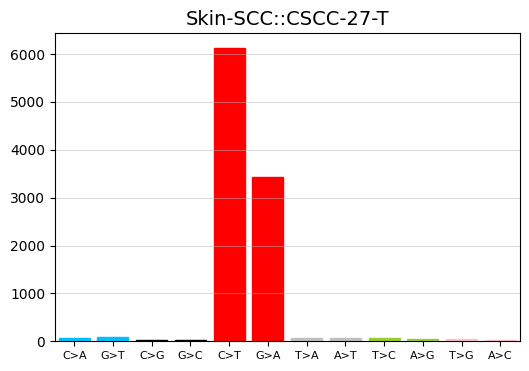

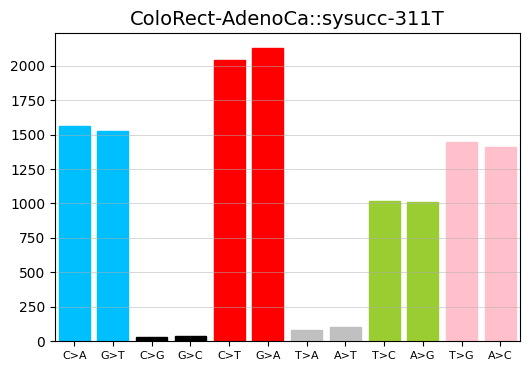

<Axes: title={'center': 'ColoRect-AdenoCa::sysucc-311T'}>

In [ ]:
cur_sample = 'Skin-SCC::CSCC-27-T'
plot_mutspec12(spectra_wes12, spectra_col=cur_sample, title=cur_sample)
cur_sample = 'ColoRect-AdenoCa::sysucc-311T'
plot_mutspec12(spectra_wes12, spectra_col=cur_sample, title=cur_sample)

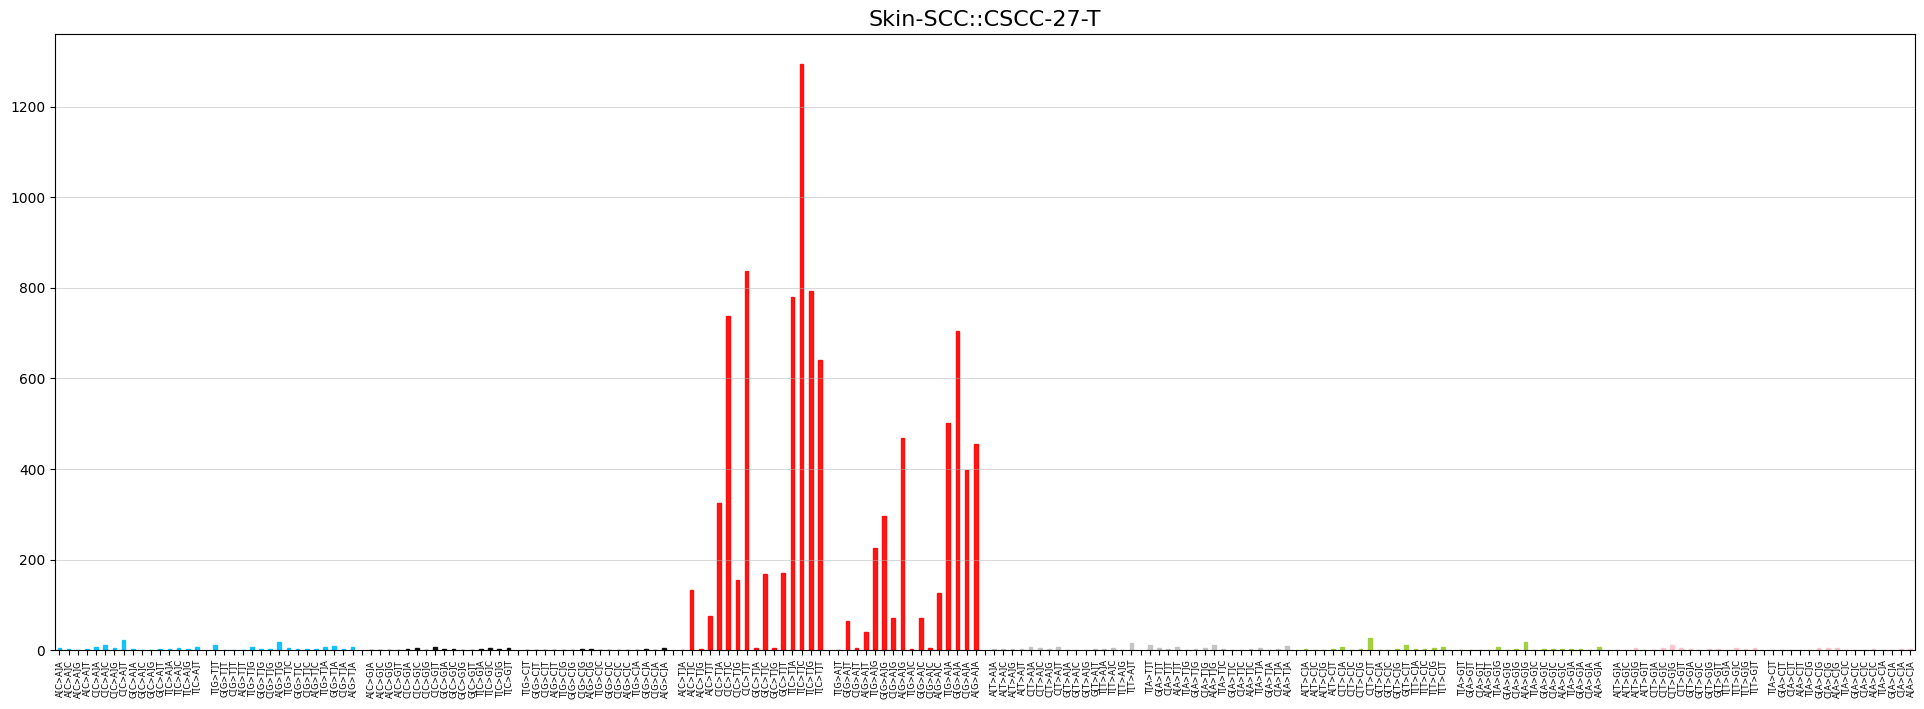

<Axes: title={'center': 'Skin-SCC::CSCC-27-T'}>

In [44]:
cur_sample = 'Skin-SCC::CSCC-27-T'
plot_mutspec192(spectra_wes192, spectra_col=cur_sample, title=cur_sample)

In [36]:
df_met = pd.read_csv('./data/nuclear_somatic_fit_metrics.csv')
df_met['label'] = df_met['disease'] + '::' + df_met['sample']

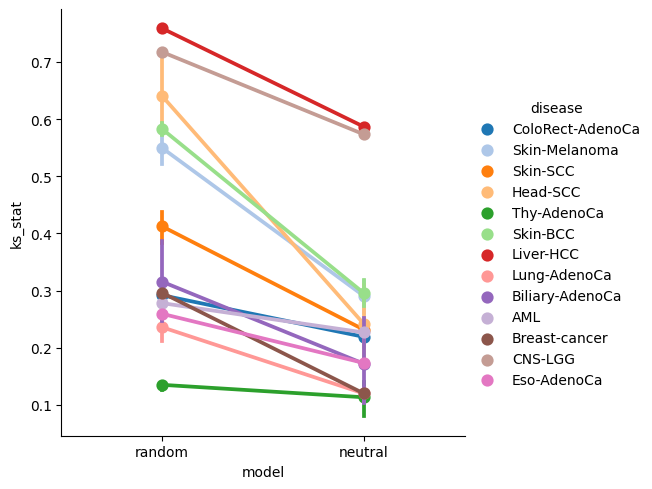

In [38]:
sns.catplot(df_met, hue='disease', y='ks_stat', x='model', 
            kind='point', order=['random', 'neutral'], palette='tab20')

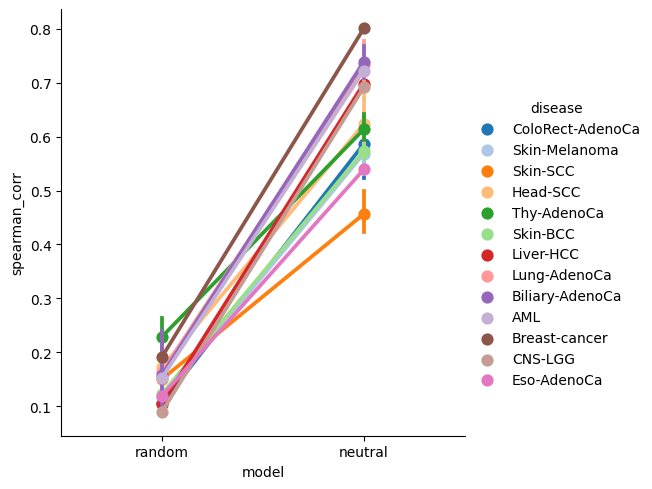

In [33]:
sns.catplot(df_met, hue='disease', y='spearman_corr', x='model', 
            kind='point', order=['random', 'neutral'], palette='tab20')